## Belief in Supernatural Evil and Guns

---

> <h4>Konstantina Saketou</h4><br />
> Assignment in Applied Machine Learning <br />
> Management Science and Technology Department <br />
> Athens University of Economics and Business

#### The assignment is based on the below study:  
Christopher G. Ellison, Benjamin Dowd-Arrow, Amy M. Burdette, Pablo E. Gonzalez, Margaret S. Kelley, Paul Froese,
"Peace through superior firepower: Belief in supernatural evil and attitudes toward gun policy in the United States", Social Science Research, Volume 99, 2021, https://doi.org/10.1016/j.ssresearch.2021.102595.

#### Dataset used:
* Froese, P. (2020, March 3). Baylor Religion Survey, Wave IV (2014), DOI: 10.17605/OSF.IO/3ZPC2  
[Available here](https://www.thearda.com/Archive/Files/Descriptions/BRS2014.asp)

#### Other scientific papers studied:
* Baker, J. (2008). Who Believes in Religious Evil? An Investigation of Sociological Patterns of Belief in Satan, Hell, and Demons. Review of Religious Research, 50(2), 206–220. http://www.jstor.org/stable/20447562  
* The Economist, 2021, "Belief in supernatural evil is a strong predictor of pro-gun beliefs" (United States section), available at https://www.economist.com/united-states/2021/11/06/belief-in-supernatural-evil-is-a-strong-predictor-of-pro-gun-beliefs 
* Sperandei, S. (2014). Understanding logistic regression analysis. Biochemia Medica, 12–18. http://dx.doi.org/10.11613/BM.2014.003

In [1]:
import pandas as pd
import statsmodels.formula.api as smf
import numpy as np

* First of all, we will read the data file and import the data  
* From the data, we keep only the columns that refer to answers to the questions asked and that also contain information about the respondents

In [2]:
initial_data = pd.read_csv("brs_data.csv")
initial_data = initial_data.loc[:,'Q1':'I_ATTEND'] # keep only columns needed
initial_data

,Q1,Q2_DK,Q3,Q3_1,Q4,Q7,Q8,Q25,Q10,Q11,...,STATE,PROJWT,WEIGHT,Q2,RELTRAD,I_GENDER,I_EDUC,I_MARITAL,I_RELIGION,I_ATTEND
0,20.0,NaN,4.0,4.0,8.0,5.0,1.0,3.0,5.0,8.0,...,TX,20086.69661,0.270000,Church of Christ,1.0,2.0,5.0,3.0,1.0,6.0
1,NaN,NaN,4.0,4.0,1.0,1.0,8.0,3.0,3.0,5.0,...,TX,26218.57317,0.352423,Church of God In Christ,3.0,2.0,3.0,3.0,3.0,2.0
2,31.0,NaN,3.0,4.0,7.0,5.0,5.0,3.0,5.0,1.0,...,ND,41408.88989,0.556608,ELCA,2.0,2.0,3.0,1.0,2.0,6.0
3,33.0,NaN,3.0,4.0,6.0,4.0,2.0,3.0,4.0,6.0,...,TX,50023.02736,0.672397,Independent Methodist,2.0,2.0,4.0,3.0,2.0,5.0
4,14.0,NaN,4.0,4.0,8.0,5.0,2.0,2.0,5.0,8.0,...,IA,230734.42840,3.101474,Don't have specific name,1.0,1.0,2.0,2.0,1.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1567,16.0,NaN,3.0,NaN,1.0,1.0,8.0,1.0,4.0,3.0,...,CA,17054.91266,0.229248,NaN,4.0,2.0,5.0,2.0,4.0,2.0
1568,16.0,NaN,8.0,3.0,0.0,NaN,8.0,2.0,3.0,1.0,...,CA,104454.33680,1.404049,NaN,4.0,2.0,2.0,2.0,4.0,1.0
1569,1.0,NaN,4.0,3.0,7.0,5.0,2.0,3.0,4.0,8.0,...,CA,153453.64200,2.062685,NaN,6.0,2.0,3.0,1.0,5.0,6.0
1570,16.0,NaN,4.0,4.0,3.0,5.0,5.0,3.0,5.0,6.0,...,CT,33324.20001,0.447935,Catolica Romana - Latinos,4.0,1.0,5.0,2.0,4.0,3.0


### Q1: Belief in Supernatural Evil Metric

* Three questions seem to relate more with the degree in which someone belives in supernatural evil  
* These are the belief in devil, hell and demons  
* We gather the answers of these three questions in the dataframe `sup_evil_data`

In [3]:
sup_evil_data = initial_data.loc[:,('Q23A','Q23C','Q23G')].copy()

In [4]:
sup_evil_data.columns = ['devil', 'hell', 'demons']

In [5]:
sup_evil_data

,devil,hell,demons
0,4.0,4.0,4.0
1,4.0,4.0,4.0
2,3.0,2.0,2.0
3,4.0,4.0,4.0
4,4.0,4.0,4.0
...,...,...,...
1567,4.0,2.0,4.0
1568,3.0,3.0,3.0
1569,4.0,4.0,3.0
1570,3.0,3.0,3.0


* First, we calculate several metrics about the amount of people that responded positively regarding the existence of those three entities  
* Below we can see that most respondents belive that devil exists, whereas less -but still plenty- belive that hell and demons also exist  
* Moreover, the most frequent answer received for these questions is 3, which represents *Probably*

In [6]:
print('Number of people asked:', len(sup_evil_data))
print('Numer of people who believe in devil:', len(sup_evil_data[sup_evil_data.devil >=3]))
print('Numer of people who believe in hell:', len(sup_evil_data[sup_evil_data.hell >=3]))
print('Numer of people who believe in demons:', len(sup_evil_data[sup_evil_data.demons >=3]))

Number of people asked: 1572
Numer of people who believe in devil: 1103
Numer of people who believe in hell: 1063
Numer of people who believe in demons: 1036


In [7]:
sup_evil_data.describe().transpose()['mean']

devil     3.149601
hell      3.088726
demons    3.016086
Name: mean, dtype: float64

* To create the supernatural evil metric, we will sum the answers of those three questions and then divide them with the average number of responses received  
* The metric created ranges from 1 to 4 with a mean of 3.09, which indicates high levels of belief in supernatural evil

In [8]:
sup_evil_metric = ((sup_evil_data.devil + sup_evil_data.hell + sup_evil_data.demons) / 3).round()
sup_evil_metric.mean()

3.090909090909091

* In order to check the accuracy of the metric we created, we will perform PCA analysis on the variables devil, hell and demons 
* When we do that, we see that belief in supernatural evil (one component created) explains the majority of the total variance (aprox. 90% !)  
* Consequently, the supernatural evil metric represents a big part of the three questions we used to create it 

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X = pca.fit(sup_evil_data.dropna())
print(f'explained variance ratio: {pca.explained_variance_ratio_}')

explained variance ratio: [0.90171495]


### Q2: Variables Selection

#### Dependent Variables

* First of all, we will form the dataframe containing the eight gun policies (dependent variables).  
* Since the answer range of these variables is 1-2, we substract 1 from all the columns in order to give them an initial binary format (0-1).

In [10]:
dependent = initial_data.loc[:,'Q73A':'Q73H'].copy()
dependent.columns=['semi_auto_weapons_ban', 'gun_safety_programs', 'armed_security_in_schools',
                  'mental_health_screening', 'high_capacity_magazine_ban', 'teachers_with_guns',
                  'civilian_gun_possesion_ban', 'support_for_concealed_carry']
dependent = dependent - 1 # values 0/1
dependent

,semi_auto_weapons_ban,gun_safety_programs,armed_security_in_schools,mental_health_screening,high_capacity_magazine_ban,teachers_with_guns,civilian_gun_possesion_ban,support_for_concealed_carry
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
1567,NaN,NaN,0.0,0.0,0.0,NaN,NaN,1.0
1568,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0
1569,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1570,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


* After the initial transformation of the variables above, their values have been shaped like so:  
    * 0 shows that the initial value of the cell was 1, which means that this specific answer was "Favor"
    * 1 shows that the initial value of the cell was 2, which means that this specific answer was "Oppose"
* We will reverse this notation in order to get:
    * 0 = Oppose
    * 1 = Favor

In [11]:
dependent.replace(0, -1, inplace=True)
dependent.replace(1, 0, inplace=True)
dependent.replace(-1, 1, inplace=True)

* Below we can see some descriptive statistics for the dependent variables

In [12]:
dependent.describe()

,semi_auto_weapons_ban,gun_safety_programs,armed_security_in_schools,mental_health_screening,high_capacity_magazine_ban,teachers_with_guns,civilian_gun_possesion_ban,support_for_concealed_carry
count,1502.000000,1515.000000,1510.000000,1512.000000,1502.000000,1504.000000,1501.000000,1502.000000
mean,0.629161,0.927393,0.621854,0.908069,0.671105,0.294548,0.290473,0.557923
std,0.483190,0.259576,0.485085,0.289024,0.469968,0.455991,0.454132,0.496799
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


* At the table below we can see the mean percentages of the dependent variables (unweighted).  
* The table presents the means of the dependent variables, which are identical to the ones in the Appendix A of the original publication.

| 	|Range  	|Mean (%) 	| 
|---	|---	|---	|
|**Ban on semi-auto guns**   	|  0-1 	| 62,9  	|      	
|**Ban on high capacity Ammo Clips**   	|   0-1	| 67,1  	|   	
|**Banning Civilian handguns**   	|   0-1	| 29,04  	|   	
|**Support for Concealed Carry Laws**   	|  0-1 	| 55,8  	|    	
|**More Armed Security at Schools**   	|  0-1 	|62,2   	|	
|**More Teachers/Faculty Having Guns**   	| 0-1  	| 29,5  	|  	
|**More Gun Safety Programs**   	| 0-1  	| 92,7  	|  	
|**Expanded Mental Health Screening**   	| 0-1  	|90,8   	|  	

#### Independent Variables

* Now we will gather all the independent variables in the dataframe `total_independents`  
* We will also add a column containing the supernatural evil metric we calculated in Q1  
* Then, we will rename the columns in order to clearly demonstrate their content

In [13]:
total_independents = initial_data.loc[:, ('Q17','Q4','I_RELIGION','Q31','Q88A', 'Q88B','Q88C','Q88D','Q88E','Q88F', 'Q89', 'AGE', 'I_GENDER', 'I_EDUC', 'Q51A','Q95','Q93','Q93_NONE','Q80')]
total_independents['sup_evil'] = sup_evil_metric
total_independents.columns=['bible','attendance','religion','political_ideol', 'white', 'black', 'indian_alaska','asian','pacific_islander', 'other','hispanic','age','gender','education','marital','income','children','no_children','area_demographics','sup_evil']

* We will create the Region variable from the answers we have regarding the state  
* First, we save inside a list the [south states of America](https://en.wikipedia.org/wiki/Southern_United_States)  
* Then, we check if each state of the dataframe exists inside the south states list or not, and we save the result at the `region` column  

In [14]:
south_states = ['AL', 'AR','DE','FL', 'GA', 'KY', 'LA', 'MS', 'MD', 'OK', 'NC','DC', 'SC', 'TN', 'TX','VA', 'WV']
total_independents['region'] = initial_data['STATE'].isin(south_states)
total_independents.region.replace(True, 'south', inplace=True)
total_independents.region.replace(False, 'not_south', inplace=True)

#### Dummy Variables

* We will now start creating dummy variables according to Appedix A.  
* First, we have the religious variables which contain the below variables:
    * Attendance: ranges from 0 to 8 and needs no dummies  
    * Bible study: ranges from 1 to 4. This variable has been separated into three different variables like so:  
        * Bible (answers 3 and 4 combined): The Bible contains Human Error, History and Fables
        * Literalism (answer = 1): The Bible means exactly what it says
        * Inerrancy (answer = 2): The Bible is true but shouldn't be taken literally  
* To create the dummies of the bible study, we add two new columns containing True or False if the corresponding answer at the 'bible' column is 1 (literalism) or 2 (inerrancy).  
* Then, we also check the values of the 'bible' column and add True where the cell value equals to 3(human error) or 4(history) and False at the opposite case.
* Finally, we replace at all three columns the value True with 1 and the value False with 0.

In [15]:
# dummies for bible
# 3,4 = 0 | literalism = 1 | inerrancy = 1
total_independents['literalism'] = total_independents.bible == 1
total_independents['inerrancy'] = total_independents.bible == 2
total_independents['bible'] = (total_independents.bible == 3) | (total_independents.bible == 4)
total_independents.bible.replace(True, 1, inplace =True)
total_independents.bible.replace(False, 0, inplace =True)
total_independents.literalism.replace(True, 1, inplace =True)
total_independents.literalism.replace(False, 0, inplace =True)
total_independents.inerrancy.replace(True, 1, inplace =True)
total_independents.inerrancy.replace(False, 0, inplace =True)

* We will now create dummies for the religion variable. We have six possible answers.  
* We use the `get_dummies` function to automaticaly create them and then we rename the output columns to better understand the result.  
* We merge the output dataframe with the `total_independents` one, which contains all the independent variables.  
* Lastly, we delete the religion column since all the information we need exists at the dummies we just created.

In [16]:
# dummies for religion
dummies_relig = pd.get_dummies(total_independents['religion']).\
    rename(columns = {1:'conservative_prot', 2:'mainline_prot', 3:'black_prot', 4:'catholic', 5:'jewish_other', 6:'no_affil'})
total_independents = total_independents.merge(dummies_relig, left_index=True, right_index=True)
del total_independents['religion']

* The variable political ideology needs no dummies since its range is 1-7 in Appendix A of the original publication as well  
* Regarding the variable 'age', we replace the invalid value 0 with NaN  
* To create variables for the gender, we use again the `get_dummies` function to generate two new columns, one for male and one for female. We merge those two columns with the `total_independents` dataframe and then, we delete the initial column called 'gender', since the information we need is now at the two new dummy columns

In [17]:
# remove invalid ages
total_independents.age.replace(0, np.nan, inplace=True)

# gender dummies
dummies_gender = pd.get_dummies(total_independents['gender']).rename(columns={1:'male',2: 'female'})
total_independents = total_independents.merge(dummies_gender, left_index=True, right_index=True)
del total_independents['gender']

* Now let's get to the variable describing the race.  
* According to the original publication, the dummy formation here is as follows:    
    * White
    * Black
    * Hispanic
    * Other
* First we create a new column where we will save the ones who answered 'Yes' to whether they are white or not
* Then, we do the same for the ones that said they are black/African American
* For the hispanic question, we will first replace the answer 'Don't know' (number 8) with `NaN` since it doesn't give us any information for the analysis. We will next save as Hispanic the answers: 2 (Mexican, Mexican-American), 3 (Puerto Rican), 4 (Cuban) and 5 (Other Hispanic, Latino, or Spanish origin group)
* Lastly, for the 'other race' category, that's where we will save the answers of the ones who are Asian, American Indian/Alaska Native, Pasific Islander or other
* We then delete the initial columns that we don't need

In [18]:
# dummies for race

# white
total_independents['non_hisp_white'] = (total_independents.white == 1)
total_independents.non_hisp_white.replace(True, 1, inplace =True) # our reference group
total_independents.non_hisp_white.replace(False, 0, inplace =True)
# black
total_independents['non_hisp_black'] = (total_independents.black==1)
total_independents.non_hisp_black.replace(True, 1, inplace =True)
total_independents.non_hisp_black.replace(False, 0, inplace =True)
# ignore 'don't know' answers for hispanic
total_independents.hispanic.replace(8, np.NaN, inplace =True)
# hispanic
total_independents['hispanic'] = ((total_independents.hispanic == 2) | (total_independents.hispanic == 5) | 
                                    (total_independents.hispanic == 3) | (total_independents.hispanic == 4) )
total_independents.hispanic.replace(True, 1, inplace =True)
total_independents.hispanic.replace(False, 0, inplace =True)
# other race
total_independents['other_race'] = ((total_independents.other == 1) | (total_independents.asian == 1) | 
                                    (total_independents.indian_alaska == 1) | (total_independents.pacific_islander == 1))
total_independents.other_race.replace(True, 1, inplace =True)
total_independents.other_race.replace(False, 0, inplace =True)

# delete race columns that we don't need
del total_independents['white']
del total_independents['black']
del total_independents['asian']
del total_independents['pacific_islander']
del total_independents['indian_alaska']
del total_independents['other']

* We will now create the dummies for the education variable.
* First, we will do some changes to the answers. We will consider the answer 3 (some college) and 4 (some kind of training) as one and include them both in the same category: `some_college`. That way, we will have five dummies in total, just like the original publication.  
* We will use again the method `get_dummies` to automatically create them.  
* Lastly, we will delete the unecessary column 'education'.

In [19]:
# dummies for education
# join choices 3 and 4 (some college or some sort of training, no degree)
total_independents.education.replace(4, 3, inplace =True)

educ_dummies = pd.get_dummies(total_independents['education']).\
    rename(columns={1:'less_than_highschool', 2:'highschool', 3:'some_college', 5:'college', 6:'postgraduate'})
total_independents = total_independents.merge(educ_dummies, left_index=True, right_index=True)

del total_independents['education']

* Next are the dummies for marital status  
* Here we have two groups:
    * Married/Cohabitating
    * Single/Not partnered
* We consider married the people who have answered number 2 and single the ones who have given any other response  
* We replace the answer 2 with the string 'married' and all the other responses with the string 'single'. Then, we use the `get_dummies` method to create two dummy columns
* Lastly, we reverse the positions of 1 and 0 in the columns like so:
    * 0 = False
    * 1 = True
* We merge the dummy columns into `total_independents` and we delete the initial `marital` column

In [20]:
total_independents.marital.replace(2, 'married', inplace =True)
total_independents.marital.replace([1,3,4,5,6], 'single', inplace =True)

mar_dummies = pd.get_dummies(total_independents['marital'])
mar_dummies.replace(1,2,inplace=True)
mar_dummies.replace(0,1,inplace=True)
mar_dummies.replace(2,0,inplace=True)
total_independents = total_independents.merge(mar_dummies, left_index=True, right_index=True)

del total_independents['marital']

* To create the dummies for the kids at home we firstly create a new column which checks whether someone has answered that has one or more children at home (column `children`)  
* We create another column where we note whether someone has answered that he has no kids at all (`no_children` = 1)
* Finally we delete the two initial columns since we don't need them anymore

In [21]:
# kids under 18 dummies
total_independents['kids_18'] = (total_independents.children > 0)
total_independents.kids_18.replace(True, 1, inplace =True)
total_independents.kids_18.replace(False, 0, inplace =True)

total_independents['no_kids_18'] = (total_independents.no_children == 1)
total_independents.no_kids_18.replace(True, 1, inplace =True)
total_independents.no_kids_18.replace(False, 0, inplace =True)

del total_independents['children']
del total_independents['no_children']

* For the area dummies, we had to join several responses
* The two groups we want to create are: urban area and small town, so we consider that
    * Urban area: answers 1 (large city) and 2 (suburb near city)
    * Small town: answers 3 (small city/town), 4 (rural area)
* So we replace number 2 with 1 and number 4 with 3 considering they are the same kind of answers
* Also, answer number 8 (don't know) doesn't give us any extra information for the analysis so we replace it with `NaN`
* We delete the initial column with the answers all together

In [22]:
# area demographics dummies
# join answers 1, 2 and 3, 4

total_independents.area_demographics.replace(2,1,inplace = True)
total_independents.area_demographics.replace(4,3,inplace = True)
total_independents.area_demographics.replace(8,np.NaN,inplace = True) # no extra info

# urban area
total_independents['urban_area'] = total_independents.area_demographics == 1
total_independents.urban_area.replace(True, 1, inplace =True)
total_independents.urban_area.replace(False, 0, inplace =True)

# small town/rural
total_independents['small_town'] = total_independents.area_demographics == 3
total_independents.small_town.replace(True, 1, inplace =True)
total_independents.small_town.replace(False, 0, inplace =True)

del total_independents['area_demographics']

* Finally, for the region dummies, we use the `get_dummies` method and we merge the two new columns created (`south` and `not_south`) into the `total_independents` dataframe
* We delete the initial column since we don't need it anymore

In [23]:
# region dummies
south_dummies = pd.get_dummies(total_independents['region'])
total_independents = total_independents.merge(south_dummies, left_index=True, right_index=True)

del total_independents['region']

**Descriptive Statistics**

**[By clicking here](https://drive.google.com/file/d/1sEXN8Ml5vAzIbZs9gND7O_-VapH0Mucc/view?usp=sharing) you can see the below table formated in a similar way to the Appendix A of the original publication.**

In [24]:
total_independents.describe().transpose().loc[:,('mean','std')]

,mean,std
bible,0.334606,0.472003
attendance,3.676735,2.932510
political_ideol,3.800789,1.554416
hispanic,0.111323,0.314632
age,52.645095,17.018217
income,4.151329,1.707939
sup_evil,3.090909,1.079909
literalism,0.225827,0.418259
inerrancy,0.333333,0.471555
conservative_prot,0.267812,0.442960


According to the above descriptive statistics, the average respondent of the research is white (74,6%), female (56,5%), single (51,9%), with no kids under 18 living at home (44,7%), with some college or technical education (30,7%) and with an average income of 35K$ per year. Also, lives in an urban area (51%) and a big part lives in the South (38,7%).

### Q3: Predict Support for Various Gun Policies

* In order to predict support for the different gun policies, we will have to run several regression models  
* The value range of those policies (dependent variables) is 0-1, so in that case, we have to perform logistic regression  
* We will do that in two models in order to see how much the gun policy predictors change depending on the independent variables taken into account each time
    * Model 1: Gun Policies with religious predictors
    * Model 2: Gun Policies with religious predictors, political ideology and demographics

In [25]:
from statsmodels.formula.api import logit

### Model 1: Gun policies with religious predictors

* Firstly, we will gather all the variables we will need into one dataframe  
* To do that, we will use the dataframe with the dummy variables we created in Q2  
* We merge the dependent variables with the independent ones into one dataframe (model1)

In [26]:
model = dependent.merge(total_independents, left_index=True, right_index = True)

* We perform logistic regression for the eight gun policies using the corresponding variable columns from `model`

In [27]:
regr1a = logit("semi_auto_weapons_ban ~ sup_evil + attendance + literalism + inerrancy + conservative_prot +"
         " + mainline_prot + black_prot + catholic + jewish_other ",model).fit()
regr2a = logit("gun_safety_programs ~ sup_evil + attendance + literalism + inerrancy + conservative_prot +"
         " + mainline_prot + black_prot + catholic + jewish_other ",model).fit()
regr3a = logit("armed_security_in_schools ~ sup_evil + attendance + literalism + inerrancy + conservative_prot +"
         " + mainline_prot + black_prot + catholic + jewish_other ",model).fit()
regr4a = logit("mental_health_screening ~ sup_evil + attendance + literalism + inerrancy + conservative_prot +"
         " + mainline_prot + black_prot + catholic + jewish_other ",model).fit()
regr5a = logit("high_capacity_magazine_ban ~ sup_evil + attendance + literalism + inerrancy + conservative_prot +"
         " + mainline_prot + black_prot + catholic + jewish_other ",model).fit()
regr6a = logit("teachers_with_guns ~ sup_evil + attendance + literalism + inerrancy + conservative_prot +"
         " + mainline_prot + black_prot + catholic + jewish_other ",model).fit()
regr7a = logit("civilian_gun_possesion_ban ~ sup_evil + attendance + literalism + inerrancy + conservative_prot +"
         " + mainline_prot + black_prot + catholic + jewish_other ",model).fit()
regr8a = logit("support_for_concealed_carry ~ sup_evil + attendance + literalism + inerrancy + conservative_prot +"
         " + mainline_prot + black_prot + catholic + jewish_other ",model).fit()

Optimization terminated successfully.
         Current function value: 0.644764
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.255198
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.623914
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.299535
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.621622
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.582640
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.568701
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.658146
         Iterations 5


* Below we can see the table containing the odds ratios for the different gun policies and variables

In [28]:
model1_odds = np.exp(regr1a.params).reset_index()
model1_odds.columns = ['variable','semi_auto_weapons_ban']
model1_odds['gun_safety_programs'] = np.exp(regr2a.params).reset_index().loc[:,0]
model1_odds['armed_security_in_schools'] = np.exp(regr3a.params).reset_index().loc[:,0]
model1_odds['mental_health_screening'] = np.exp(regr4a.params).reset_index().loc[:,0]
model1_odds['high_capacity_magazine_ban'] = np.exp(regr5a.params).reset_index().loc[:,0]
model1_odds['teachers_with_guns'] = np.exp(regr6a.params).reset_index().loc[:,0]
model1_odds['civilian_gun_possesion_ban'] = np.exp(regr7a.params).reset_index().loc[:,0]
model1_odds['support_for_concealed_carry'] = np.exp(regr8a.params).reset_index().loc[:,0]
model1_odds

,variable,semi_auto_weapons_ban,gun_safety_programs,armed_security_in_schools,mental_health_screening,high_capacity_magazine_ban,teachers_with_guns,civilian_gun_possesion_ban,support_for_concealed_carry
0,Intercept,3.179176,18.898381,0.378594,19.608004,3.735334,0.168522,0.928321,0.501725
1,sup_evil,0.731579,0.827492,1.540567,0.759499,0.754780,1.415570,0.669052,1.482267
2,attendance,1.021204,0.955790,0.925394,0.992028,1.027865,0.957964,1.056332,0.983847
3,literalism,0.944027,0.869563,2.061198,1.104254,0.907153,0.883956,1.274790,1.047767
4,inerrancy,0.996512,1.088545,1.240414,1.227740,0.985676,0.904432,0.963205,0.783635
5,conservative_prot,1.153290,1.538788,1.290376,0.777223,1.040191,1.483553,0.792280,1.090174
6,mainline_prot,1.342797,1.508483,1.348325,1.420248,1.186542,0.980298,0.776629,1.109185
7,black_prot,1.944769,1.751977,1.565029,1.591665,1.764892,0.538017,2.647879,0.410996
8,catholic,1.536528,1.855287,1.208377,1.677888,1.378048,0.799509,1.425830,0.684985
9,jewish_other,2.041308,1.792139,1.153514,1.503632,1.917890,0.814986,1.669410,0.573202


The above odds ratios show us some very interesting results. 
In this model, we see that belief in supernatural evil is positively associated with several gun policies. More specifically: 
* The odds of support for armed security in schools will be increased for someone who believes in supernatural evil rather than someone who doesn't (OR = 1,54)
* The odds of someone to approve the arming of teachers are also higher for someone who believes in supernatural evil (OR = 1,41)
* The same thing happens with the support for laws allowing the concealed carry of handguns (OR = 1,48)

However, there is an inverse association in belief in supernatural evil with the approval of a semi auto weapons ban (OR ≃ 0,73). Also, people who believe in supernatural evil, tend to oppose with the existence of gun safety programs (OR ≃ 0,82). The same thing happens with the ban in civillian gun possesion (OR ≃ 0,66). This means that the ones who believe in supernatural evil are more likely to support civilian gun ownership as well as high capacity magazine ownership.

Moreover, we observe that the odds of approving a semi auto weapons ban are the same for people who belive that the bible contains inerrancies compared to the ones who belive that it contains humar error and history (OR = 0,99 ≃ 1). The same thing happens with the odds of approving a high-capacity Ammo clips ban (OR = 0,98 ≃ 1).  


Religion also plays an important role since it is positively associated with the majority of those gun policies, compared to people with no religious affiliation. However, religion is negatively associated with the approval of teachers having guns, which means that the more religious someone is, the odds of him supporting gun ownership from teachers decrease.

### Model 2: Gun Policies with religious predictors, political ideology and demographics

* We will use the same dataframe as in Model 1 (`model`)
* We save the column names of the independent variables that we will need in the `all_columns` list. We will not use the variables that are considered as reference groups so we remove them from the list.
* Then, we perform logistic regression for the eight gun policies

In [29]:
all_columns = list(total_independents.columns)
ref_groups = ['no_affil', 'male', 'non_hisp_white', 'highschool', 'no_kids_18', 'small_town', 'not_south', 'single', 'bible']
all_columns =[ele for ele in all_columns if ele not in ref_groups]

In [30]:
regr1b = logit("semi_auto_weapons_ban ~ " +' + '.join(all_columns),model).fit()
regr2b = logit("gun_safety_programs ~" +' + '.join(all_columns),model).fit()
regr3b = logit("armed_security_in_schools ~" +' + '.join(all_columns),model).fit()
regr4b = logit("mental_health_screening ~ " +' + '.join(all_columns),model).fit()
regr5b = logit("high_capacity_magazine_ban ~ " +' + '.join(all_columns),model).fit()
regr6b = logit("teachers_with_guns ~ " +' + '.join(all_columns),model).fit()
regr7b = logit("civilian_gun_possesion_ban ~ " +' + '.join(all_columns),model).fit()
regr8b = logit("support_for_concealed_carry ~ " +' + '.join(all_columns),model).fit()

Optimization terminated successfully.
         Current function value: 0.531460
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.235456
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.589943
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.272716
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.529039
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.524175
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.517679
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.587264
         Iterations 6


* Below we can see the table containing the odds ratios for the different gun policies and variables

In [31]:
model2_odds = np.exp(regr1b.params).reset_index()
model2_odds.columns = ['variable','semi_auto_weapons_ban']
model2_odds['gun_safety_programs'] = np.exp(regr2b.params).reset_index().loc[:,0]
model2_odds['armed_security_in_schools'] = np.exp(regr3b.params).reset_index().loc[:,0]
model2_odds['mental_health_screening'] = np.exp(regr4b.params).reset_index().loc[:,0]
model2_odds['high_capacity_magazine_ban'] = np.exp(regr5b.params).reset_index().loc[:,0]
model2_odds['teachers_with_guns'] = np.exp(regr6b.params).reset_index().loc[:,0]
model2_odds['civilian_gun_possesion_ban'] = np.exp(regr7b.params).reset_index().loc[:,0]
model2_odds['support_for_concealed_carry'] = np.exp(regr8b.params).reset_index().loc[:,0]
model2_odds

,variable,semi_auto_weapons_ban,gun_safety_programs,armed_security_in_schools,mental_health_screening,high_capacity_magazine_ban,teachers_with_guns,civilian_gun_possesion_ban,support_for_concealed_carry
0,Intercept,0.019238,0.969582,6.725033,0.779869,0.034009,6.225331,0.052418,13.005933
1,attendance,1.039516,0.942228,0.899069,1.003111,1.036000,0.940892,1.066686,0.965753
2,political_ideol,1.729463,1.471598,0.787194,1.537830,1.639252,0.668815,1.427820,0.666764
3,hispanic,1.566445,1.383903,1.079756,3.743916,1.318213,0.629372,2.044564,0.697881
4,age,1.027903,1.014063,0.994018,1.014472,1.032823,0.986032,1.012266,0.991781
5,income,1.087413,1.034639,0.845693,0.985306,0.988615,0.991473,0.965003,0.948347
6,sup_evil,0.782807,0.987627,1.397345,0.866084,0.841282,1.345509,0.737170,1.424358
7,literalism,1.278039,1.018296,1.511995,1.023341,1.088931,0.660742,1.420664,0.698911
8,inerrancy,1.146689,1.203292,1.097730,1.053254,1.099581,0.886684,0.986486,0.654439
9,conservative_prot,1.827610,1.866710,1.181938,1.133062,1.222477,1.203354,0.977565,0.851695


After including several demographic factors and mediators in model 2, we result into more detailed and informative conclusions.  
Belief in supernatural evil continues to have a positive association with the three gun policies mentioned in model 1. Those are: existence of armed security in schools (OR = 1.39), support for teachers having guns (OR = 1.34) and support for concealed carry laws (OR = 1.42).  

Let's see how and if political ideology controls, combined with belief in supernatural evil, influence the opinion of people regarding the eight gun policies:  
* We found a strong inverse association between belief in supernatural evil and support for a ban on high capacity ammunition magazines (OR = 0.74, model 1). This effect is being slightly reduced by political ideology (OR = 0.83, model 2)
* People who believe in supernatural evil are more likely to be in favor of a ban of civillian gun ownership (OR = 0.66, model 1). This behavior continues to be true after the adjustments of political ideology and other variables (OR = 0.73, model 2)
* Belief in supernatural evil is positively associated with the approval of concealed carry of handguns (OR = 1.48, model 1), and this pattern doesn't change after the political ideology controls (OR = 1.42, model 2)
* The odds of someone to support the arming of teachers in schools is positively associated with his belief in supernatural evil ( OR = 1.54, model 1). This association remains after taking into account the political ideology controls ( OR = 1.39, model 2)

Now regarding the demographics, females are way more likely -compared to males- to support a semi automatic weapons ban (OR = 3.42), the existence of gun safety programs (OR = 1.8), the ban of high capacity magazines (OR = 2.8) and the ban of civillian handgun possesion (OR = 1.39).  
Consequently, they are more likely -compared to males- to oppose to the existence of armed security in schools (OR = 0.94), to the gun ownership by teachers (OR = 0.48) and to the existence of concealed carry laws (OR = 0.47).

***
According to the [research report](https://www.economist.com/united-states/2021/11/06/belief-in-supernatural-evil-is-a-strong-predictor-of-pro-gun-beliefs) in The Economist:  
<span style="font-size:17px"> <i>Each step up on a four-point scale measuring the strength of belief in supernatural evil correlated with 32% more support for arming teachers, and a 38% rise in backing for carrying concealed weapons.</i> </span>
***

The above statement can be evaluated from the analysis we performed here since the ratios we came up with are very similar. In model 2, we found that the odds ratio of someone to be in favor of arming teachers is 1,34. This means that a one-unit increase in the strength of someone's belief in supernatural evil is associated with a 34% increase in support for arming teachers. The corresponding odds ratio for the support for concealed carry laws is 1,42, that is, a 42% increase. 

### Q4: Additional Estimations of the Strength of Predictors

* We will perform linear regression with the variables of model 2 in order to get the standardized coefficients and to better understand our results.
* We use the same dataframe (`model`) as in logistic regression

#### ---- Standardized Values ----

* We will firstly standardize our values so that they have a mean of zero and standard deviation equal to one.
* We will do that using `StandardScaler`
* The table below contains descriptive statistics of the standardized values

In [32]:
from sklearn import preprocessing

standard_scaler = preprocessing.StandardScaler()
model2_scaled = standard_scaler.fit_transform(model)
model2_scaled = pd.DataFrame(model2_scaled)
model2_scaled.columns = model.columns
model2_scaled.describe()

,semi_auto_weapons_ban,gun_safety_programs,armed_security_in_schools,mental_health_screening,high_capacity_magazine_ban,teachers_with_guns,civilian_gun_possesion_ban,support_for_concealed_carry,bible,attendance,...,college,postgraduate,married,single,kids_18,no_kids_18,urban_area,small_town,not_south,south
count,1.502000e+03,1.515000e+03,1.510000e+03,1.512000e+03,1.502000e+03,1.504000e+03,1.501000e+03,1.502000e+03,1.572000e+03,1.556000e+03,...,1.572000e+03,1.572000e+03,1.572000e+03,1.572000e+03,1.572000e+03,1.572000e+03,1.572000e+03,1.572000e+03,1.572000e+03,1.572000e+03
mean,1.666074e-16,-1.049399e-16,2.655712e-16,-2.413560e-16,-5.197795e-16,6.927083e-16,3.204188e-16,7.539464e-17,4.018555e-16,-3.031351e-16,...,-1.202742e-16,-1.515610e-16,-1.737372e-16,-1.874384e-16,-5.368903e-16,1.222375e-15,4.610392e-16,1.591885e-16,-1.980321e-16,1.980321e-16
std,1.000333e+00,1.000330e+00,1.000331e+00,1.000331e+00,1.000333e+00,1.000333e+00,1.000333e+00,1.000333e+00,1.000318e+00,1.000321e+00,...,1.000318e+00,1.000318e+00,1.000318e+00,1.000318e+00,1.000318e+00,1.000318e+00,1.000318e+00,1.000318e+00,1.000318e+00,1.000318e+00
min,-1.302532e+00,-3.573895e+00,-1.282374e+00,-3.142881e+00,-1.428456e+00,-6.461661e-01,-6.398357e-01,-1.123409e+00,-7.091319e-01,-1.254188e+00,...,-5.773503e-01,-5.204003e-01,-9.848476e-01,-1.038925e+00,-5.842062e-01,-9.005886e-01,-1.020568e+00,-9.169239e-01,-1.257490e+00,-7.952350e-01
25%,-1.302532e+00,2.798067e-01,-1.282374e+00,3.181795e-01,-1.428456e+00,-6.461661e-01,-6.398357e-01,-1.123409e+00,-7.091319e-01,-9.130731e-01,...,-5.773503e-01,-5.204003e-01,-9.848476e-01,-1.038925e+00,-5.842062e-01,-9.005886e-01,-1.020568e+00,-9.169239e-01,-1.257490e+00,-7.952350e-01
50%,7.677356e-01,2.798067e-01,7.798036e-01,3.181795e-01,7.000567e-01,-6.461661e-01,-6.398357e-01,8.901476e-01,-7.091319e-01,-2.308442e-01,...,-5.773503e-01,-5.204003e-01,-9.848476e-01,9.625334e-01,-5.842062e-01,-9.005886e-01,9.798468e-01,-9.169239e-01,7.952350e-01,-7.952350e-01
75%,7.677356e-01,2.798067e-01,7.798036e-01,3.181795e-01,7.000567e-01,1.547590e+00,1.562901e+00,8.901476e-01,1.410175e+00,1.133614e+00,...,0.000000e+00,-5.204003e-01,1.015386e+00,9.625334e-01,1.711724e+00,1.110385e+00,9.798468e-01,1.090603e+00,7.952350e-01,1.257490e+00
max,7.677356e-01,2.798067e-01,7.798036e-01,3.181795e-01,7.000567e-01,1.547590e+00,1.562901e+00,8.901476e-01,1.410175e+00,1.474728e+00,...,1.732051e+00,1.921598e+00,1.015386e+00,9.625334e-01,1.711724e+00,1.110385e+00,9.798468e-01,1.090603e+00,7.952350e-01,1.257490e+00


* We perform the linear regressions with the eight gun policies
* At the table below we can see the standardized coefficients for each gun policy and predictor

In [33]:
ol1 = smf.ols("semi_auto_weapons_ban ~" +' + '.join(all_columns), data=model2_scaled).fit()
ol2 = smf.ols("gun_safety_programs ~" +' + '.join(all_columns), data=model2_scaled).fit()
ol3 = smf.ols("armed_security_in_schools ~" +' + '.join(all_columns), data=model2_scaled).fit()
ol4 = smf.ols("mental_health_screening ~" +' + '.join(all_columns), data=model2_scaled).fit()
ol5 = smf.ols("high_capacity_magazine_ban ~" +' + '.join(all_columns), data=model2_scaled).fit()
ol6 = smf.ols("teachers_with_guns ~" +' + '.join(all_columns), data=model2_scaled).fit()
ol7 = smf.ols("civilian_gun_possesion_ban ~" +' + '.join(all_columns), data=model2_scaled).fit()
ol8 = smf.ols("support_for_concealed_carry ~" +' + '.join(all_columns), data=model2_scaled).fit()

In [34]:
model2_linear_scaled = ol1.params.reset_index()
model2_linear_scaled.columns = ['variable','semi_auto_weapons_ban']
model2_linear_scaled['gun_safety_programs'] = ol2.params.reset_index().loc[:,0]
model2_linear_scaled['armed_security_in_schools'] = ol3.params.reset_index().loc[:,0]
model2_linear_scaled['mental_health_screening'] = ol4.params.reset_index().loc[:,0]
model2_linear_scaled['high_capacity_magazine_ban'] = ol5.params.reset_index().loc[:,0]
model2_linear_scaled['teachers_with_guns'] = ol6.params.reset_index().loc[:,0]
model2_linear_scaled['civilian_gun_possesion_ban'] = ol7.params.reset_index().loc[:,0]
model2_linear_scaled['support_for_concealed_carry'] = ol8.params.reset_index().loc[:,0]
model2_linear_scaled

,variable,semi_auto_weapons_ban,gun_safety_programs,armed_security_in_schools,mental_health_screening,high_capacity_magazine_ban,teachers_with_guns,civilian_gun_possesion_ban,support_for_concealed_carry
0,Intercept,-0.004226,0.006502,0.001915,-0.002288,-0.007319,0.010464,-0.029946,0.010309
1,attendance,0.042500,-0.043259,-0.124058,-0.000048,0.040174,-0.071628,0.063930,-0.037588
2,political_ideol,0.314903,0.137067,-0.159465,0.161509,0.289149,-0.238977,0.216531,-0.263410
3,hispanic,0.052261,0.021673,0.010026,0.074931,0.033354,-0.051556,0.095999,-0.047126
4,age,0.164573,0.055700,-0.041469,0.061388,0.199559,-0.086775,0.080553,-0.056020
5,income,0.046941,0.010207,-0.117202,-0.011874,-0.011916,-0.001310,-0.022987,-0.034926
6,sup_evil,-0.088487,0.001960,0.166049,-0.034814,-0.062130,0.118431,-0.130257,0.158638
7,literalism,0.039011,-0.002783,0.062607,-0.000764,0.011411,-0.068415,0.059262,-0.062846
8,inerrancy,0.023725,0.023408,0.018420,0.012120,0.015164,-0.023826,0.002892,-0.081661
9,conservative_prot,0.085970,0.061236,0.030007,-0.006732,0.021394,0.048972,0.009260,-0.032801


#### ---- Unstandardized Values ----

* We will use the unstandardized coefficients to interpret our results
* We perform linear regression again to the unstandardized values

In [35]:
ol1 = smf.ols("semi_auto_weapons_ban ~" +' + '.join(all_columns), data=model).fit()
ol2 = smf.ols("gun_safety_programs ~" +' + '.join(all_columns), data=model).fit()
ol3 = smf.ols("armed_security_in_schools ~" +' + '.join(all_columns), data=model).fit()
ol4 = smf.ols("mental_health_screening ~" +' + '.join(all_columns), data=model).fit()
ol5 = smf.ols("high_capacity_magazine_ban ~" +' + '.join(all_columns), data=model).fit()
ol6 = smf.ols("teachers_with_guns ~" +' + '.join(all_columns), data=model).fit()
ol7 = smf.ols("civilian_gun_possesion_ban ~" +' + '.join(all_columns), data=model).fit()
ol8 = smf.ols("support_for_concealed_carry ~" +' + '.join(all_columns), data=model).fit()

* Below we can see the coefficients of each gun policy and predictor

In [36]:
model2_linear = ol1.params.reset_index()
model2_linear.columns = ['variable','semi_auto_weapons_ban']
model2_linear['gun_safety_programs'] = ol2.params.reset_index().loc[:,0]
model2_linear['armed_security_in_schools'] = ol3.params.reset_index().loc[:,0]
model2_linear['mental_health_screening'] = ol4.params.reset_index().loc[:,0]
model2_linear['high_capacity_magazine_ban'] = ol5.params.reset_index().loc[:,0]
model2_linear['teachers_with_guns'] = ol6.params.reset_index().loc[:,0]
model2_linear['civilian_gun_possesion_ban'] = ol7.params.reset_index().loc[:,0]
model2_linear['support_for_concealed_carry'] = ol8.params.reset_index().loc[:,0]
model2_linear

,variable,semi_auto_weapons_ban,gun_safety_programs,armed_security_in_schools,mental_health_screening,high_capacity_magazine_ban,teachers_with_guns,civilian_gun_possesion_ban,support_for_concealed_carry
0,Intercept,-0.181095,0.759841,0.867490,0.712593,-0.069789,0.786035,-0.048873,1.021814
1,attendance,0.007003,-0.003829,-0.020521,-0.000005,0.006438,-0.011138,0.009900,-0.006368
2,political_ideol,0.097887,0.022889,-0.049764,0.030031,0.087422,-0.070104,0.063261,-0.084187
3,hispanic,0.080258,0.017880,0.015458,0.068832,0.049821,-0.074718,0.138560,-0.074410
4,age,0.004673,0.000850,-0.001182,0.001043,0.005511,-0.002325,0.002150,-0.001635
5,income,0.013280,0.001551,-0.033288,-0.002009,-0.003279,-0.000350,-0.006112,-0.010159
6,sup_evil,-0.039593,0.000471,0.074588,-0.009318,-0.027039,0.050008,-0.054777,0.072980
7,literalism,0.045066,-0.001727,0.072608,-0.000528,0.012821,-0.074586,0.064344,-0.074646
8,inerrancy,0.024310,0.012885,0.018948,0.007428,0.015113,-0.023039,0.002785,-0.086032
9,conservative_prot,0.093777,0.035884,0.032861,-0.004392,0.022698,0.050412,0.009493,-0.036787


***
At this point, we are able to evaluate another statement from the research paper of The Economist:  
<span style="font-size:17px"> <i>The effect of belief in supernatural evil on support for the right to carry concealed guns was roughly the same as having conservative politics or not possessing a college degree, but smaller than the effect of gender.</i> </span>
***

By observing the coefficients we found, we generally see that the effect of the belief in supernatural evil varies among the different gun policies. However, it is similar in range with that of the level of education and political opinions. For example, we see that regarding the support for concealed carry, the effect of belief in supernatural evil (0.07) is very close with the one of political ideology (0.08) and having a college degree (0.04). However, it is much smaller than the effect of gender (0.15).  
Gender's coefficients vary with relatively big differences in its values. For example, the support for the semi automatic weapons ban is positively related with the gender with a coefficient of 0.23. Gender is also positively related with the existence of gun safety programs, but the coefficient here is almost 0.035, much lower compared to the previous gun policy.

We also notice that the level of education is negatively related with several gun policies. Those are:  
* Existence of gun safety programs
* Armed security in schools
* More teachers with guns
* Support for concealed carry laws  

### Q5: Compare with Decision Trees / Random Forest Estimators

* After having worked with both logistic and linear regression on our data, we will now work with decision trees and check our results

In [37]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from io import StringIO
from IPython.display import Image
from sklearn.model_selection import cross_val_score, KFold
from scipy.stats import sem
import pydotplus

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

* First of all, we gather all the gun policy answers as well as the predictors in the same dataframe (`tree_data`)
* In `xs` we save all the variables that will act as the features of the tree (predictors)

In [38]:
tree_data = dependent.merge(total_independents, left_index = True, right_index = True)

xs = tree_data.dropna().iloc[:,8:].copy()

**Semi auto weapons ban**  
* In `semi_auto_y` we put all the answers for the question regarding the support for a semi auto weapons ban  
* Then we try different `max_depth` values and run k-fold validation

In [39]:
semi_auto_y = tree_data.dropna().loc[:,'semi_auto_weapons_ban'].transpose()
all_depths = []
all_mean_scores = []

for max_depth in range(1, 12):
    all_depths.append(max_depth)
    simple_tree = DecisionTreeRegressor(max_depth=max_depth)
    cv = KFold(n_splits=5, shuffle=True, random_state=13)
    scores = cross_val_score(simple_tree, xs, semi_auto_y, cv=cv)
    mean_score = np.mean(scores)
    all_mean_scores.append(np.mean(scores))
    print("max_depth = ", max_depth, scores, mean_score, sem(scores))

max_depth =  1 [0.08282467 0.03987328 0.02351024 0.04665327 0.08911829] 0.05639595075073707 0.012685852349559714
max_depth =  2 [0.1923667  0.18098301 0.06502353 0.07548888 0.18193803] 0.13916003079640016 0.028249162966663688
max_depth =  3 [0.22811468 0.17812596 0.0804343  0.08295459 0.15483928] 0.14489376387434902 0.02839057678021838
max_depth =  4 [0.21520814 0.15049563 0.0776419  0.09917226 0.159353  ] 0.14037418443224978 0.024182325913322603
max_depth =  5 [0.2436141  0.12654458 0.11185932 0.05836359 0.12887246] 0.1338508106878078 0.03025565302870142
max_depth =  6 [ 0.16682787  0.03822039  0.00023284 -0.07124422  0.00422956] 0.027653288725860703 0.039091238319475696
max_depth =  7 [ 0.02275542 -0.12776264  0.00746288 -0.16981602 -0.13394868] -0.0802618101754619 0.03966530969266155
max_depth =  8 [-0.1222714  -0.22837263 -0.12069234 -0.19014982 -0.34895681] -0.202088599197828 0.042071245286664394
max_depth =  9 [-0.24993897 -0.2850282  -0.26236736 -0.28128597 -0.53704395] -0.32313

* We get the highest score for depth = 3 so we create the tree for that depth

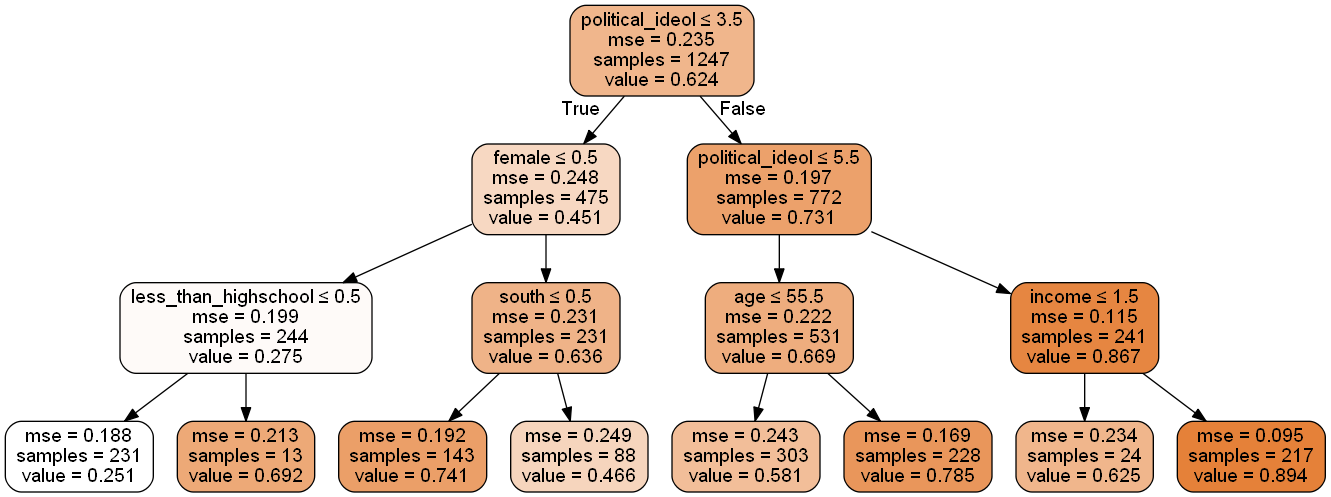

In [40]:
dot_data = StringIO()  
tree.export_graphviz(DecisionTreeRegressor(max_depth=3).fit(xs, semi_auto_y), out_file=dot_data,
                     special_characters=True, filled=True, rounded=True, feature_names=xs.columns)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png()) 

* We see that political ideology is a feature of high significance for the semi auto weapons ban support since we can see it in two levels of the tree
* Then we have gender and with less significance we have education, region, age and income
* However, we will also use `BaggingClassifier` to improve our score

In [41]:
semi_auto_tree = BaggingClassifier(DecisionTreeClassifier(criterion='entropy'),
                                       n_estimators=50, 
                                       n_jobs=-1)
bagged_cv_score = cross_val_score(semi_auto_tree, 
                                  xs, 
                                  semi_auto_y, 
                                  cv=3, scoring='accuracy')

print('Imrpoved Score: ',np.mean(bagged_cv_score), sem(bagged_cv_score))

Imrpoved Score:  0.6952695396972505 0.0042008087760738305


**Gun safety programs**  
* We will again try different depths in the case of gun safety programs policy
* After many tries, we have max score at depth one so we create the tree

In [42]:
gun_safety_y = tree_data.dropna().loc[:,'gun_safety_programs'].transpose()

all_depths = []
all_mean_scores = []
for max_depth in range(1, 8):
    all_depths.append(max_depth)
    simple_tree = DecisionTreeRegressor(max_depth=max_depth)
    cv = KFold(n_splits=5, shuffle=True, random_state=13)
    scores = cross_val_score(simple_tree, xs, gun_safety_y, cv=cv)
    mean_score = np.mean(scores)
    all_mean_scores.append(np.mean(scores))
    print("max_depth = ", max_depth, scores, mean_score, sem(scores))

max_depth =  1 [ 0.01286629  0.02077125  0.01527091 -0.00076726  0.02230429] 0.014089096196478667 0.004097218248514591
max_depth =  2 [-0.02220497  0.02187973 -0.0182204   0.04071865  0.02000801] 0.00843620263085978 0.012260195548672614
max_depth =  3 [-0.07564693  0.00331021 -0.10320086  0.05406606  0.00334932] -0.023624441738136027 0.028746842273301928
max_depth =  4 [-0.10816308 -0.04662944 -0.19710505 -0.07690714 -0.13571033] -0.11290300924021227 0.025807471659920596
max_depth =  5 [-0.20490175 -0.1470719  -0.23262155 -0.10447523 -0.20509819] -0.17883372285171767 0.02323843092108073
max_depth =  6 [-0.30140361 -0.27381425 -0.68985509 -0.19970029 -0.30167772] -0.35329019157337804 0.08617954519796647
max_depth =  7 [-0.48234869 -0.2161834  -0.65139698 -0.43509913 -0.31103137] -0.41921191455658774 0.074522536480616


* We see again that political ideology plays a very significant role in support for gun safety programs since this is the tree we get for the highest score

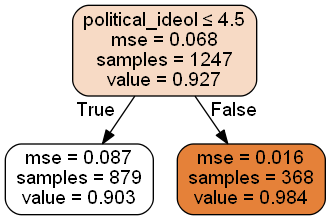

In [43]:
dot_data = StringIO()  
tree.export_graphviz(DecisionTreeRegressor(max_depth=1).fit(xs, gun_safety_y), out_file=dot_data,
                     special_characters=True, filled=True, rounded=True, feature_names=xs.columns)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png()) 

* We then use `BaggingClassifier` to improve our score

In [44]:
gun_safety_tree = BaggingClassifier(DecisionTreeClassifier(criterion='entropy'),
                                       n_estimators=50, 
                                       n_jobs=-1)
bagged_cv_score = cross_val_score(gun_safety_tree, 
                                  xs, 
                                  gun_safety_y, 
                                  cv=3, scoring='accuracy')

print('Improved Score: ',np.mean(bagged_cv_score), sem(bagged_cv_score))

Improved Score:  0.9230170682730924 0.001336360593060244


**Armed security in schools**
* After trying different depths, we get the best score at depth = 3 so we create the tree

In [45]:
armed_security_y = tree_data.dropna().loc[:,'armed_security_in_schools'].transpose()

all_depths = []
all_mean_scores = []
for max_depth in range(1, 8):
    all_depths.append(max_depth)
    simple_tree = DecisionTreeRegressor(max_depth=max_depth)
    cv = KFold(n_splits=5, shuffle=True, random_state=13)
    scores = cross_val_score(simple_tree, xs, armed_security_y, cv=cv)
    mean_score = np.mean(scores)
    all_mean_scores.append(np.mean(scores))
    print("max_depth = ", max_depth, scores, mean_score, sem(scores))

max_depth =  1 [0.06440321 0.0030547  0.00677318 0.04319472 0.04366996] 0.032219152063347134 0.011801398891425655
max_depth =  2 [0.10136329 0.03194312 0.01415563 0.08929607 0.06797263] 0.06094614755409959 0.01660897866386345
max_depth =  3 [0.10266606 0.05032687 0.00695711 0.10976848 0.07748695] 0.06944109443518284 0.01879432511188641
max_depth =  4 [ 0.11439212  0.00742723 -0.02209055  0.11660096  0.04621486] 0.05250892217528669 0.02790553269579594
max_depth =  5 [ 0.09400483 -0.04070329 -0.10061989  0.07162988 -0.01050849] 0.002760607728400255 0.035931317150883664
max_depth =  6 [ 0.06004216 -0.10455752 -0.2026325  -0.01940926 -0.07182957] -0.06767733795002406 0.043722054196241575
max_depth =  7 [ 0.05639738 -0.22831615 -0.2903236  -0.17364278 -0.27375216] -0.18192746341769278 0.06292883839148765


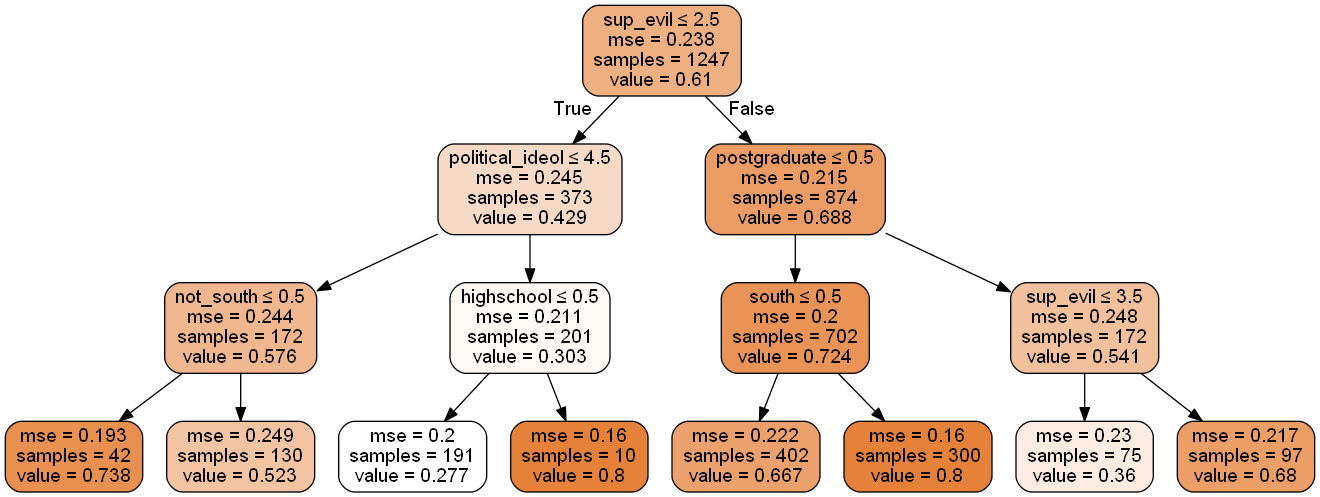

In [46]:
dot_data = StringIO()  
tree.export_graphviz(DecisionTreeRegressor(max_depth=3).fit(xs, armed_security_y), out_file=dot_data,
                     special_characters=True, filled=True, rounded=True, feature_names=xs.columns)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png()) 

* We see that the feature with the most significance is the belief in supernatural evil being on top of the tree  
* Then, we have political ideology again together with postgraduate level of education
* Finally, we have region (south or not), highschool education and belief in supernatural evil again

* We then use `BaggingClassifier` to improve our score

In [47]:
armed_security_tree = BaggingClassifier(DecisionTreeClassifier(criterion='entropy'),
                                       n_estimators=50, 
                                       n_jobs=-1)
bagged_cv_score = cross_val_score(armed_security_tree, 
                                  xs, 
                                  armed_security_y, 
                                  cv=3, scoring='accuracy')

print('Improved Score: ',np.mean(bagged_cv_score), sem(bagged_cv_score))

Improved Score:  0.668794408402842 0.00787672838907885


**Mental Health screening**
* After trying different depths, we get the best score at depth = 1 so we create the tree

In [48]:
mental_health_y = tree_data.dropna().loc[:,'mental_health_screening'].transpose()

all_depths = []
all_mean_scores = []
for max_depth in range(1, 8):
    all_depths.append(max_depth)
    simple_tree = DecisionTreeRegressor(max_depth=max_depth)
    cv = KFold(n_splits=5, shuffle=True, random_state=13)
    scores = cross_val_score(simple_tree, xs, mental_health_y, cv=cv)
    mean_score = np.mean(scores)
    all_mean_scores.append(np.mean(scores))
    print("max_depth = ", max_depth, scores, mean_score, sem(scores))

max_depth =  1 [ 0.01435918  0.03158575 -0.02488171  0.01910757  0.03711023] 0.015456205458922479 0.010887475711152443
max_depth =  2 [ 0.03179944 -0.00626423 -0.02467689  0.03414432 -0.03568283] -0.00013603884803146116 0.014315027632265978
max_depth =  3 [-0.00598748 -0.02011298 -0.08588561 -0.02008662 -0.10938644] -0.04829182568145609 0.02064592360230743
max_depth =  4 [-0.02371393 -0.19803195 -0.19555611 -0.14956853 -0.17055461] -0.147485023624016 0.0321882361138855
max_depth =  5 [-0.10283201 -0.21200067 -0.49445042 -0.23431004 -0.30665301] -0.27004922953442373 0.0649246695886327
max_depth =  6 [-0.38751411 -0.67862327 -0.65725856 -0.3169766  -0.38552687] -0.4851798830231494 0.07576050663353387
max_depth =  7 [-0.39107344 -0.89500983 -0.83374804 -0.5857537  -0.64653965] -0.6704249335100794 0.09024682616541453


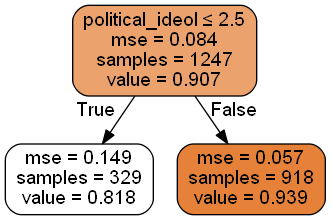

In [49]:
dot_data = StringIO()  
tree.export_graphviz(DecisionTreeRegressor(max_depth=1).fit(xs, mental_health_y), out_file=dot_data,
                     special_characters=True, filled=True, rounded=True, feature_names=xs.columns)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png()) 

* Political ideology is the deatire with the most significance for the mental health screening factor  
* We will now use `BaggingClassifier` to improve our score

In [50]:
mental_health_tree = BaggingClassifier(DecisionTreeClassifier(criterion='entropy'),
                                       n_estimators=50, 
                                       n_jobs=-1)
bagged_cv_score = cross_val_score(mental_health_tree, 
                                  xs, 
                                  mental_health_y, 
                                  cv=3, scoring='accuracy')

print('Improved Score: ',np.mean(bagged_cv_score), sem(bagged_cv_score))

Improved Score:  0.8997586499845536 0.0008447531881099846


**High Capacity Magazine Ban**
* After trying different depths, we get the best score at depth = 3 so we create the tree

In [51]:
magazine_ban_y = tree_data.dropna().loc[:,'high_capacity_magazine_ban'].transpose()

all_depths = []
all_mean_scores = []
for max_depth in range(1, 11):
    all_depths.append(max_depth)
    simple_tree = DecisionTreeRegressor(max_depth=max_depth)
    cv = KFold(n_splits=5, shuffle=True, random_state=13)
    scores = cross_val_score(simple_tree, xs, magazine_ban_y, cv=cv)
    mean_score = np.mean(scores)
    all_mean_scores.append(np.mean(scores))
    print("max_depth = ", max_depth, scores, mean_score, sem(scores))

max_depth =  1 [0.08465911 0.06059322 0.04840479 0.01792189 0.10651717] 0.06361923543166932 0.01518517632396489
max_depth =  2 [0.09430895 0.0962979  0.03379462 0.0580707  0.12446376] 0.08138718652419903 0.01589591793137267
max_depth =  3 [0.15685457 0.11603058 0.04749482 0.05716154 0.11191651] 0.09789160447466402 0.020249846726410493
max_depth =  4 [0.13171906 0.12795835 0.06525011 0.0513546  0.10484544] 0.09622551233342518 0.016300218995086595
max_depth =  5 [0.08252711 0.1052613  0.06539008 0.03979491 0.01838036] 0.06227075006926517 0.015329330268140469
max_depth =  6 [-0.01288948  0.0084686   0.0005305  -0.01837404 -0.05394117] -0.015241118707616352 0.010779457194272332
max_depth =  7 [-0.06422907 -0.02120469 -0.11527595 -0.14174121 -0.10017236] -0.08852465434039045 0.020982797533133694
max_depth =  8 [-0.15388789 -0.24406469 -0.27612283 -0.29772346 -0.24278157] -0.2429160886532417 0.024529464786181017
max_depth =  9 [-0.30809973 -0.20797029 -0.37245482 -0.322883   -0.2745244 ] -0.

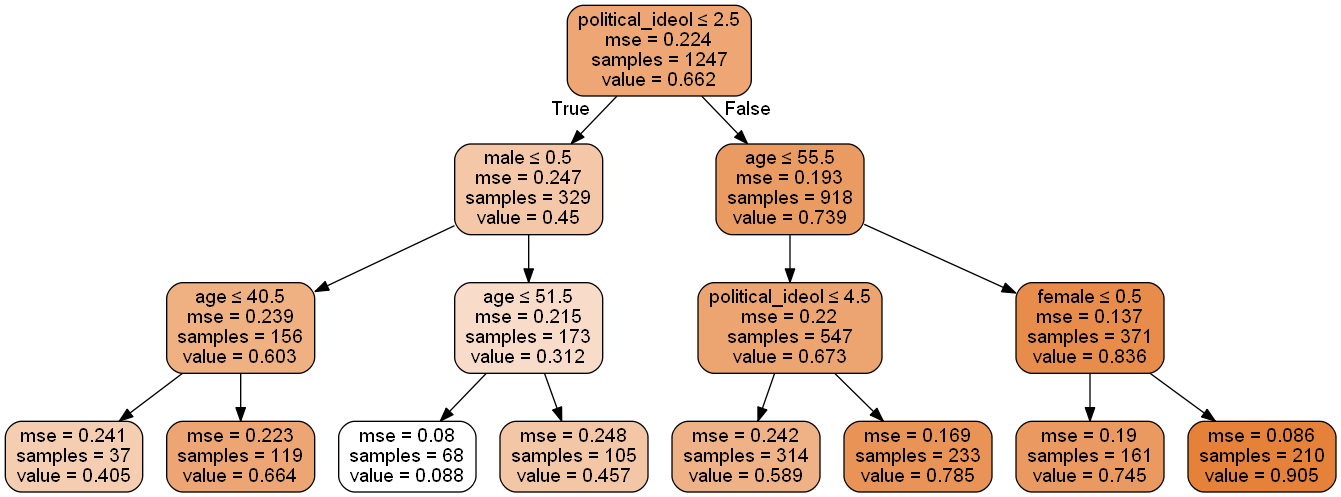

In [52]:
dot_data = StringIO()  
tree.export_graphviz(DecisionTreeRegressor(max_depth=3).fit(xs, magazine_ban_y), out_file=dot_data,
                     special_characters=True, filled=True, rounded=True, feature_names=xs.columns)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png()) 

* Political ideology is the feature with the highest significance
* Then, we gender and age playing also an importan role in support for high capacity magazine ban
* We will now use `BaggingClassifier` to improve our score

In [53]:
magazine_ban_tree = BaggingClassifier(DecisionTreeClassifier(criterion='entropy'),
                                       n_estimators=50, 
                                       n_jobs=-1)
bagged_cv_score = cross_val_score(magazine_ban_tree, 
                                  xs, 
                                  magazine_ban_y, 
                                  cv=3, scoring='accuracy')

print('Improved score: ',np.mean(bagged_cv_score), sem(bagged_cv_score))

Improved score:  0.7201227988878592 0.005397584811718652


**Teachers with guns**
* After trying different depths, we get the best score at depth = 2 so we create the tree

In [54]:
teachers_with_guns_y = tree_data.dropna().loc[:,'teachers_with_guns'].transpose()

all_depths = []
all_mean_scores = []
for max_depth in range(1, 8):
    all_depths.append(max_depth)
    simple_tree = DecisionTreeRegressor(max_depth=max_depth)
    cv = KFold(n_splits=5, shuffle=True, random_state=13)
    scores = cross_val_score(simple_tree, xs, teachers_with_guns_y, cv=cv)
    mean_score = np.mean(scores)
    all_mean_scores.append(np.mean(scores))
    print("max_depth = ", max_depth, scores, mean_score, sem(scores))

max_depth =  1 [ 0.09187013  0.093256   -0.00339895  0.0590025   0.06665482] 0.06147689974430655 0.017571951642863508
max_depth =  2 [ 0.09773414  0.10097467 -0.01261921  0.10242318  0.08789314] 0.07528118271118897 0.0221207121716371
max_depth =  3 [0.08116175 0.07991383 0.00305438 0.11385118 0.05535334] 0.0666668961379722 0.018420760583717586
max_depth =  4 [ 0.0680451   0.09784875 -0.01698703  0.10121583  0.05282075] 0.06058867774913177 0.021415891211603696
max_depth =  5 [-0.01067821  0.07927567 -0.06969208  0.03384506  0.01037006] 0.008624101888074808 0.02463411566892441
max_depth =  6 [-0.12332406  0.09705633 -0.14417766 -0.04389534 -0.08273879] -0.059415905197172415 0.04274178941887398
max_depth =  7 [-0.29040559 -0.06054975 -0.28488196 -0.13132313 -0.26778923] -0.2069899329344082 0.0468466044198058


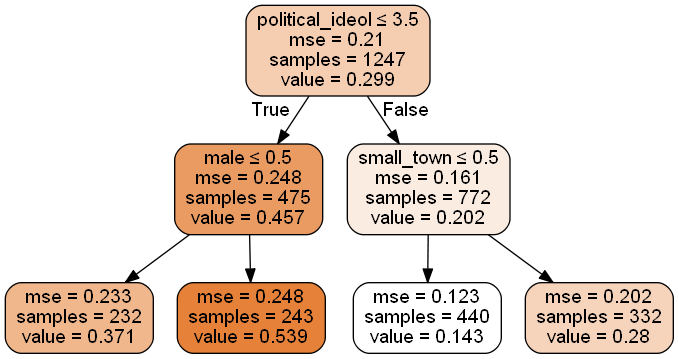

In [55]:
dot_data = StringIO()  
tree.export_graphviz(DecisionTreeRegressor(max_depth=2).fit(xs, teachers_with_guns_y), out_file=dot_data,
                     special_characters=True, filled=True, rounded=True, feature_names=xs.columns)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png()) 

* After creating the tree, we see that political ideology has the most significance. Then, we have gender and also whether someone lives in a small town or not
* To improve our score, we will now use `BaggingClassifier`

In [56]:
teachers_with_guns_tree = BaggingClassifier(DecisionTreeClassifier(criterion='entropy'),
                                       n_estimators=50, 
                                       n_jobs=-1)
bagged_cv_score = cross_val_score(teachers_with_guns_tree, 
                                  xs, 
                                  teachers_with_guns_y, 
                                  cv=3, scoring='accuracy')

print('Improved score: ',np.mean(bagged_cv_score), sem(bagged_cv_score))

Improved score:  0.696866311399444 0.004381057810332734


**Civilian Gun Possesion Ban**
* After trying different depths, we get the best score at depth = 3 so we create the tree

In [57]:
civilian_gun_posses_y = tree_data.dropna().loc[:,'civilian_gun_possesion_ban'].transpose()

all_depths = []
all_mean_scores = []
for max_depth in range(1, 10):
    all_depths.append(max_depth)
    simple_tree = DecisionTreeRegressor(max_depth=max_depth)
    cv = KFold(n_splits=5, shuffle=True, random_state=13)
    scores = cross_val_score(simple_tree, xs, civilian_gun_posses_y, cv=cv)
    mean_score = np.mean(scores)
    all_mean_scores.append(np.mean(scores))
    print("max_depth = ", max_depth, scores, mean_score, sem(scores))

max_depth =  1 [0.08009633 0.05727892 0.01735961 0.02422257 0.06493916] 0.04877931887276514 0.01205066494075131
max_depth =  2 [ 0.08817133  0.0863434  -0.014476    0.03471437  0.07351214] 0.0536530486545528 0.01956373620823774
max_depth =  3 [0.07438815 0.08903108 0.00287892 0.02986366 0.08965146] 0.05716265514105763 0.017406602401050852
max_depth =  4 [-0.01680185  0.03672404 -0.06673473  0.02977658  0.03621617] 0.0038360415525868774 0.02025976462405771
max_depth =  5 [-0.1094602  -0.00334433 -0.08002697  0.03615636 -0.04665088] -0.040665204848365374 0.026088626650258094
max_depth =  6 [-0.12023418 -0.12222807 -0.22377837 -0.01064035 -0.08676438] -0.11272907182449221 0.03433276552109837
max_depth =  7 [-0.16922848 -0.23514336 -0.19763739 -0.11052454 -0.18447189] -0.1794011305084219 0.02038742029817059
max_depth =  8 [-0.2141663  -0.44773987 -0.39605484 -0.26154468 -0.37403994] -0.33870912613558807 0.043525720981294404
max_depth =  9 [-0.29262269 -0.5177743  -0.58211423 -0.38911767 -0

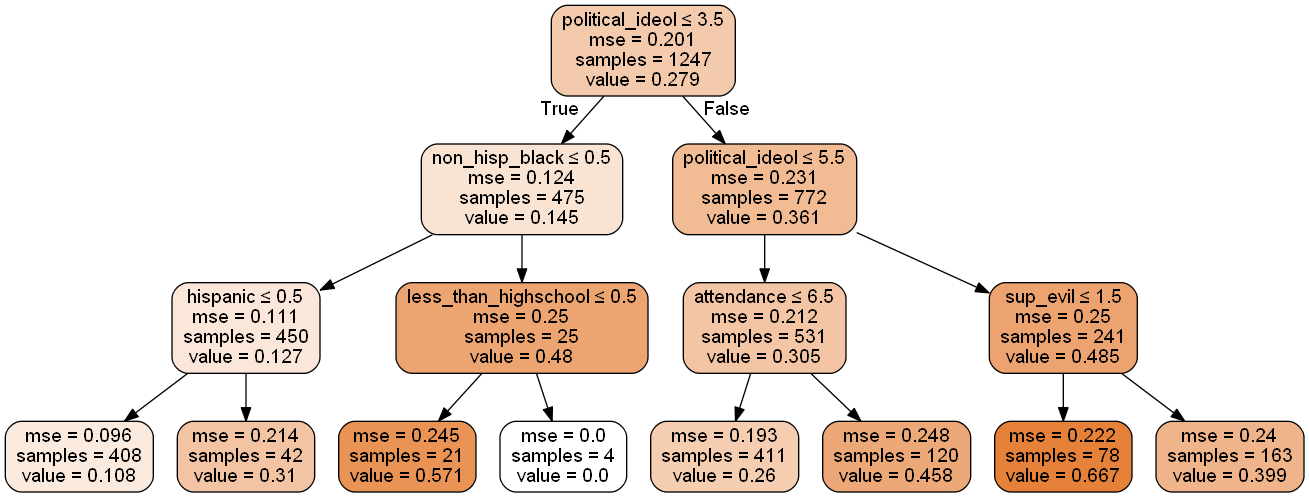

In [58]:
dot_data = StringIO()  
tree.export_graphviz(DecisionTreeRegressor(max_depth=3).fit(xs, civilian_gun_posses_y), out_file=dot_data,
                     special_characters=True, filled=True, rounded=True, feature_names=xs.columns)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png()) 

* After creating the tree, we see that political ideology is the most important feature
* Other features with significant importance are race, education, attendance and belief in supernatural evil
* Now in order to improve our score, we will use `BaggingClassifier`

In [59]:
civilian_gun_posses_tree = BaggingClassifier(DecisionTreeClassifier(criterion='entropy'),
                                       n_estimators=50, 
                                       n_jobs=-1)
bagged_cv_score = cross_val_score(semi_auto_tree, 
                                  xs, 
                                  civilian_gun_posses_y, 
                                  cv=3, scoring='accuracy')

print('Improved Score: ',np.mean(bagged_cv_score), sem(bagged_cv_score))

Improved Score:  0.7217253629904233 0.006983102681187177


**Concealed Carry Laws**
* After trying different depths, we get the best score at depth = 2 so we create the tree

In [60]:
concealed_carry_y = tree_data.dropna().loc[:,'support_for_concealed_carry'].transpose()

all_depths = []
all_mean_scores = []
for max_depth in range(1, 8):
    all_depths.append(max_depth)
    simple_tree = DecisionTreeRegressor(max_depth=max_depth)
    cv = KFold(n_splits=5, shuffle=True, random_state=13)
    scores = cross_val_score(simple_tree, xs, concealed_carry_y, cv=cv)
    mean_score = np.mean(scores)
    all_mean_scores.append(np.mean(scores))
    print("max_depth = ", max_depth, scores, mean_score, sem(scores))

max_depth =  1 [0.12897407 0.09371078 0.04061414 0.00864701 0.08130836] 0.07065087130276118 0.020968573753455996
max_depth =  2 [0.15914364 0.13675839 0.05979081 0.04918873 0.11386025] 0.10374836222538737 0.021412109307267835
max_depth =  3 [0.14495553 0.1386447  0.04400415 0.05588281 0.07053849] 0.09080513672733086 0.0212620869505116
max_depth =  4 [0.11664459 0.05287011 0.05164846 0.02668784 0.05570567] 0.060711333977381085 0.014924482934221993
max_depth =  5 [ 0.04109396  0.01755463  0.03125427 -0.05329264  0.03615986] 0.01455401387936366 0.01741012833774567
max_depth =  6 [ 0.04866416 -0.01341606 -0.08461022 -0.02940118  0.00731578] -0.01428950450636659 0.021913558519435057
max_depth =  7 [-0.06980598 -0.0849536  -0.19066261 -0.11236015 -0.17181079] -0.12591862589526648 0.023778633821042876


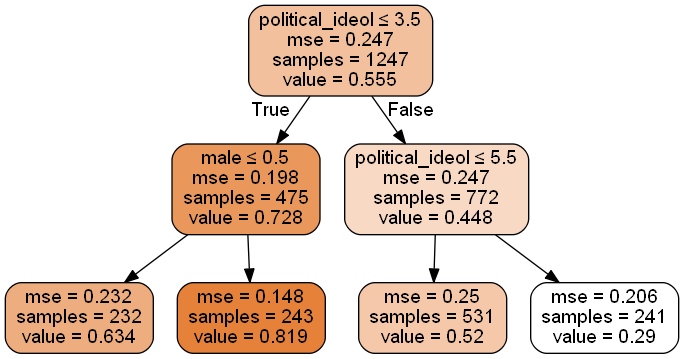

In [61]:
dot_data = StringIO()  
tree.export_graphviz(DecisionTreeRegressor(max_depth=2).fit(xs, concealed_carry_y), out_file=dot_data,
                     special_characters=True, filled=True, rounded=True, feature_names=xs.columns)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png()) 

* After creating the tree, we see that political ideology and gender are the two most significant features for the support for concealed carry law policy 
* We will also use `BaggingClassifier` to improve our score

In [62]:
concealed_carry_tree = BaggingClassifier(DecisionTreeClassifier(criterion='entropy'),
                                       n_estimators=50, 
                                       n_jobs=-1)
bagged_cv_score = cross_val_score(concealed_carry_tree, 
                                  xs, 
                                  concealed_carry_y, 
                                  cv=3, scoring='accuracy')

print('Improved Score: ',np.mean(bagged_cv_score), sem(bagged_cv_score))

Improved Score:  0.6367392647513129 0.0074666814348572684


* Overall we see that political ideology is one of the most important factors that influence support for the gun policies we analyzed here
* Belief in supernatural evil is also important with bigger significance in some of the policies
* We also observe that its influence is smaller than that of political ideology